<a href="https://www.scinbre.org/learning/bioinformatics-workshops/2024-summer-workshops"><img src="https://i.ibb.co/N6W5kPM/inbre-header.png" alt="inbre-header" border="0"></a>


### Machine Learning in Python
### June 10th, 2024

# First hour - Random number generators

Random number generation (RNG) is a process used to produce a sequence of random numbers.

- Random numbers are typically generated to correspond to samples from a specific probability distribution, commonly the uniform distribution over the [0, 1) interval.

- In most applications, including those we will explore, the numbers generated are not truly random but pseudorandom. This means they are produced by a deterministic algorithm that starts with an initial value called a seed. The sequence of numbers appears random but can be reproduced if the seed is known.

Most of the functionality we will need can be found in the `np.random` module of NumPy. Let us begin by creating some random numbers with a uniform distribution.

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Some pretty Seaborn settings
sns.set(style="white")
rc={'lines.linewidth': 2, 'axes.labelsize': 18, 'axes.titlesize': 18}
sns.set(rc=rc)

In [ ]:
np.random.random(size=10)

array([0.17604375, 0.96727638, 0.21913216, 0.61043887, 0.73244247,
       0.6061332 , 0.0135328 , 0.20191553, 0.03129706, 0.79941018])

The `random()` function within the `np.random` module produces random numbers within the interval [0,1). You can specify the number of random numbers you want to generate using the `size` keyword argument. The numbers are returned in the form of a NumPy array.

To verify that the numbers are being correctly generated from a uniform distribution, we can plot their cumulative distribution functions (CDF). We will generate 100,000 random numbers and plot these along with the CDF to observe their distribution.

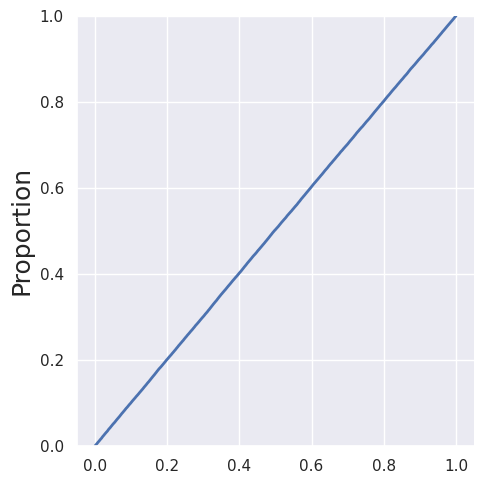

In [ ]:
# Generate sorted random numbers
x = np.sort(np.random.random(size=100000))

# Plot the emperical CDF
sns.displot(x=x, kind="ecdf")


It appears that our random number generator is performing well.

Generating random numbers uniformly is one of the most frequently utilized techniques in random number generation. In fact, many other random generation methods are based on outputs from the uniform distribution. For instance, simulating "coin flips," where the outcome is either zero or one, can be achieved using this method:

In [ ]:
# Generate 20 random numbers on uniform interval
x = np.random.random(size=20)

# Make them coin flips
heads = x > 0.5

# Show which were heads, and count the number of heads
print(heads)
print(f'\nThere were {np.sum(heads)} heads out of {len(x)} draws.')

[False False  True False False  True  True  True False  True  True  True
 False  True False  True False False  True False]

There were 10 heads out of 20 draws.


## Seeding Random Number Generators

To show that random number generation operates deterministically, we can seed the random number generator explicitly. Normally, generators are seeded with values like the current date/time to ensure uniqueness in the sequences produced.


By setting a specific seed, we can demonstrate that the same sequence of random numbers is produced each time.

In [ ]:
# Seed the RNG
np.random.seed(42)

# Generate random numbers
np.random.random(size=10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [ ]:
# Re-seed the RNG
np.random.seed(42)

# Generate random numbers
np.random.random(size=10)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

The random numbers are exactly the same. If we choose a different seed, we get totally different random numbers.

In [ ]:
# change the seed and check the variation
np.random.seed(2)

# Generate random numbers
np.random.random(size=10)

#Notice the diffrence in the outputs here...

array([0.4359949 , 0.02592623, 0.54966248, 0.43532239, 0.4203678 ,
       0.33033482, 0.20464863, 0.61927097, 0.29965467, 0.26682728])

## Generating Random Numbers from Various Distributions

It is also possible to generate random numbers from different probability distributions. For instance, consider drawing random samples from a Normal distribution characterized by a mean (μ) and standard deviation (σ).

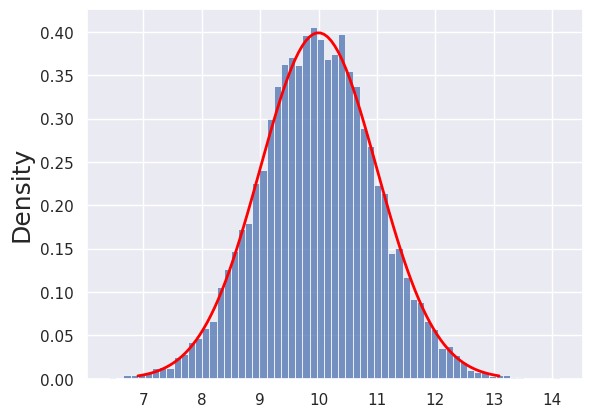

In [ ]:
# Set parameters
mu = 10
sigma = 1

# Draw 10000 random samples
draws = np.random.normal(mu, sigma, size=10000)

# Plot a histogram of our draws
sns.histplot(draws, stat="density");

# Overlaying the corresponding normal distribution
# probability density function (pdf)
from scipy.stats import norm
rv = norm(loc=mu, scale=sigma)
x = np.linspace(rv.ppf(0.001),
                rv.ppf(0.999), 100)  # 100 points lineary distributed
                                      # between the 0.1th and 99.9th percentiles
plt.plot(x, rv.pdf(x), color='red', lw=2,
         label='frozen pdf')

It looks Normal, but let's test the mean and standard deviation.


In [ ]:
from scipy.stats import ttest_1samp
pval = ttest_1samp(draws, mu)[1]

f"mean={np.mean(draws):.3f}, str={np.std(draws):.3f}, p-value={pval:.3f}"

'mean=9.981, str=1.000, p-value=0.054'


That is correct, with a mean of 10 and a standard deviation of 1!


## Generating Random Numbers from Discrete Distributions

Until now, our generated random numbers have been derived from continuous probability distributions. It is also possible to generate random numbers from discrete distributions. We have demonstrated this capability with the "coin flips" example, but it extends to other types of distributions. A common example involves selecting a random integer from a specified set. For instance, to randomly select one integer from the set `{0, 1, 2, 3}`, we can use the `np.random.randint()` function.

In [ ]:
# Draw random integers on [0, 5), i.e., exclusive of last one.
np.random.randint(0, 5, 20)

array([4, 3, 2, 0, 4, 4, 3, 4, 0, 0, 0, 4, 1, 2, 2, 1, 4, 4, 0, 2])

For example, this can be used to generate random DNA sequences (e.g., to generate null distributions in Monte Carlo approaches). Let us see an example:


In [ ]:
# Key of bases
bases = 'ATGC'

# Draw random numbers for sequence
x = np.random.randint(0, 4, 50)

# Fancy indexing
seq_list = np.array(list(bases))[x]

# Join the sequence
''.join(seq_list)

'GCTGTAATCTATGTTCGGCATCACATCAAGTCGCCTGTTCTGAGCAGCAC'

## Selecting Elements from an Array Randomly

Randomly selecting elements from an array is a common task. The np.random.choice() function is specifically designed for this. Alternatively, you could achieve similar results using np.random.randint() by using the integers to represent indices in the array. However, `np.random.choice()` includes a useful keyword argument, `replace`, which allows you to specify whether to draw elements with or without replacement. For instance, if you have 100 samples and need to send only 20 to a testing facility, using `np.random.randint()` might lead to duplicate selections.

In [ ]:
import pandas as pd
x = np.random.randint(0, 51, 20)
counts_df = pd.DataFrame(np.unique(x, return_counts=True),
                         index=["values", "counts"])
counts_df.T.sort_values("counts", ascending=False).head()

,values,counts
6,23,3
1,12,2
5,22,2
11,33,2
0,9,1


For no repetition :

We can use np.random.choice() instead.

In [ ]:
x = np.random.choice(np.arange(51), 20, replace=False)
counts_df = pd.DataFrame(np.unique(x, return_counts=True),
                         index=["values", "counts"])
counts_df.T.sort_values("counts", ascending=False).head()

,values,counts
0,2,1
1,4,1
18,45,1
17,44,1
16,43,1


## Shuffling an Array

The np.random.permutation() function is handy for rearranging the elements in an array. It mixes up the order of entries! For example, let us use it to shuffle a deck of cards.






In [ ]:
# itertools is a builtin library which contains various useful
# iterators. Here, product just takes the product of multiple series...
# For example product([1, 2], ["a", "b", "c"]) produce the equivalent of
# [[1, "a"], [1, "b"], [1, "c"], [2, "a"], [2, "b"], [2, "c"]]
from itertools import product

values = ['A'] + list(np.arange(2, 11).astype(str)) + ["J", "Q", "K"]
kinds = ["♦", "♣", "♥", "♠"]
deck = [value+kind for kind, value in product(kinds, values)]
np.random.permutation(deck)  # Shuffled deck... let's play now!

array(['4♦', '9♠', '2♥', '2♦', '3♦', '6♠', '2♠', '8♥', '5♥', 'A♦', '7♦',
       'A♥', '8♠', 'K♥', 'A♠', '5♣', '10♠', 'Q♠', '10♣', '6♦', 'J♣', 'J♠',
       'K♦', '9♥', 'Q♣', '4♥', '7♣', 'K♣', '3♠', '4♣', '6♣', 'A♣', '5♦',
       '4♠', 'J♥', '8♣', '8♦', '2♣', '10♥', '6♥', '3♥', '9♣', 'Q♥', '5♠',
       'Q♦', 'K♠', '9♦', 'J♦', '3♣', '10♦', '7♥', '7♠'], dtype='<U3')

## The Random Module

While it offers fewer features than np.random, the random module in the standard library still provides some practical functionality. Notably, the random.choice() method can accept a string as input and select characters from that string. For instance, this method can be used to generate random DNA sequences as follows.

In [ ]:
N = 50
''.join([random.choice('ATGC') for i in range(N)])

'AGGAAACGCCAGGAAAGCTATCACATGAAACCGGTAGCATCGCCAAACGT'

## Exercise: Simulate a Simple Lottery Draw

In this exercise, you'll create a Python script to simulate a lottery draw using the random module. The task will help you understand random number generation and list manipulation.

**Task:**

1.Generate Lottery Tickets:
*    Write a script to generate 100 lottery tickets.
*    Each ticket is a combination of 6 unique numbers, where each number is between 1 and 50.

2. Simulate a Winning Ticket:
*    Randomly select one ticket from your list of 100 tickets to be the "winning" ticket.
*    Print out the winning ticket.

# Second hour - Multivariate random numbers

## Introduction to Multivariate Random Numbers

Multivariate random numbers involve arrays of random numbers drawn from multivariate distributions. These distributions consider variables varying randomly across more than one dimension at a time, potentially with dependencies between the different dimensions (i.e., covariance).

Key distributions to understand in a multivariate context include:

*  **Multivariate normal distribution**: It is an extension of the normal distribution into multiple dimensions, where the mean and covariance structure define the distribution of the variables. This is an example of a continuous multivariate distribution.
  
*  **Multinomial distribution**: It generalizes the binomial distribution to more than two outcomes, useful for modeling probability outcomes from multiple categories. This is an example of a discrete multivariate distribution.

## Generating Multivariate Normal Random Numbers

We use `numpy.random.multivariate_normal(mean, cov, size)` to generate random numbers from a multivariate normal distribution:

*    `mean` is the vector of mean values for the different dimensions.
*    `cov` is the covariance matrix, which must be symmetric and positive-semidefinite.
*    `size` dictates the number of samples to generate.

In [ ]:
# Define mean and covariance matrix for a bivariate normal distribution
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]  # Diagonal elements are variances, off-diagonal are covariances

# Generate 10 2D random vectors from the distribution
samples = np.random.multivariate_normal(mean, cov, 10)
print(samples)

[[-0.37511406 -0.6686677 ]
 [ 0.46515064 -0.09640424]
 [-0.85811094  1.70078751]
 [ 1.18130266 -1.19014003]
 [-0.39363511  2.29859021]
 [ 1.28277657  3.17985346]
 [ 0.04345609  0.2110017 ]
 [-0.90702978 -0.72826081]
 [ 0.90786218  2.00276052]
 [-0.67661337 -1.06384767]]


**Example:** The role of the covariance matrix in determining the correlation between variables and the spread of the distribution

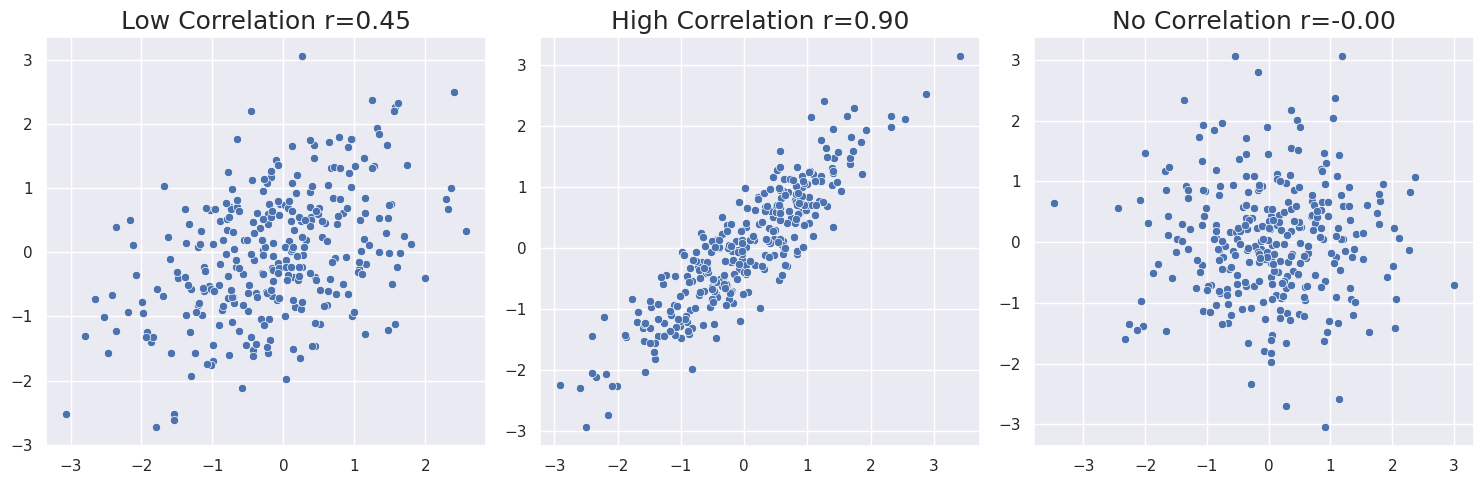

In [ ]:

# Create sample data with different covariance matrices
means = [0, 0]
covariances = [
               [[1, 0.5],
                [0.5, 1]],

               [[1, 0.9],
                [0.9, 1]],

               [[1, 0.0],
                [0.0, 1]]
              ]
cases = ["Low Correlation", "High Correlation", "No Correlation"]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# The zip() function allows to loop multiple iterables
# at a same time
for ax, cov, case in zip(axes, covariances, cases):
    data = np.random.multivariate_normal(means, cov, 300)
    x, y = data.T  # Data are shape 300 X 2 before transposition
    sns.scatterplot(x=x, y=y, ax=ax)
    ax.set_title(f"{case} r={np.corrcoef(x, y)[0, 1]:.2f}")

plt.tight_layout()


## Multinomial Distribution

The **multinomial distribution** is a generalization of the binomial distribution. It models the probabilities of the various possible outcomes of a multinomial experiment, where each trial results in exactly one of several different categories, with each category having a fixed probability of occurrence. This distribution is useful when an experiment results in more than two possible outcomes, unlike the binomial distribution, which only handles scenarios with two possible outcomes (e.g., success and failure).


Suppose we want to simulate the result of rolling a fair six-sided dice 60 times. The probability of each face coming up is 1/6​. Here is how we might model this scenario :

In [ ]:
# Parameters
n = 60  # number of trials
pvals = [1/6] * 6  # equal probability for each die face

# Generate a sample from the multinomial distribution
sample = np.random.multinomial(n, pvals)

print("Multinomial distribution sample (number of times each face appears):")
print(sample)

Multinomial distribution sample (number of times each face appears):
[11  9  6 13 13  8]


Let us explore more examples using Python's `numpy.random.multinomial` function to model various scenarios that fit the multinomial distribution. These examples will demonstrate how versatile the multinomial distribution is for handling different types of data that involve multiple categories or classes.

## Modeling Traffic at an Intersection

Suppose we want to simulate the number of cars going straight, turning left, and turning right at a city intersection over a period of one hour. Let us assume we count a total of 300 cars during this period, with the probabilities of these actions being 50% for going straight, 30% for turning left, and 20% for turning right.

In [ ]:
# Parameters
n = 300  # total number of cars
pvals = [0.5, 0.3, 0.2]  # probabilities for straight, left turn, right turn

# Multinomial distribution simulation
traffic_flow = np.random.multinomial(n, pvals)

print("Traffic distribution [Straight, Left turn, Right turn]:")
print(traffic_flow)

Traffic distribution [Straight, Left turn, Right turn]:
[140  94  66]


## Exercise: Simulation of Social Media Engagement

**Background:**
Imagine you are a data analyst at a social media company, and you want to understand the distribution of user engagement across different types of posts. The company classifies posts into four categories: Text, Image, Video, and Link. The goal of this exercise is to simulate the engagement (likes, shares, comments) on these posts for a day.

**Objective:**
Simulate user engagement on different types of posts and analyze the probability of engagement types varying between post types.

**Task Steps:**

1. Define the Probabilities:z
*    Assume that the total engagements per day are 10,000.
*    The probabilities of a post being Text, Image, Video, and Link are 20%, 40%, 30%, and 10%, respectively.
*    Define a separate set of probabilities for the type of engagement (like, share, comment) for each type of post:
 *       Text: 70% likes, 20% shares, 10% comments.
 *       Image: 50% likes, 30% shares, 20% comments.
 *       Video: 40% likes, 30% shares, 30% comments.
 *       Link: 85% likes, 10% shares, 5% comments.


2. Simulate the Engagements:
*    Use the numpy.random.multinomial to simulate the total engagements for each post type.
*    Use the numpy.random.multinomial again to distribute these engagements into likes, shares, and comments according to the specified probabilities.

3. Analyze and Visualize:
*    Summarize the total likes, shares, and comments for each post type.
*    Visualize the data using a stacked bar chart showing the composition of likes, shares, and comments for each post type.

# Homework

This homework picks up where we left off in the first exercise of this session (the lottery example).

**Task:**

 1. Determine Winnings:
 * Create a random set of 6 winning numbers (this is your "winning combination") for the lottery example used for the exercise from the first hour.
 * For each ticket in your list of 100, count how many numbers it has in common with the winning combination.
 * Print a message for each ticket showing how many numbers it matched:
  *  6 matches: "Jackpot!"
  *  5 matches: "Second Prize"
  *  4 matches: "Third Prize"
  *  3 matches: "Consolation Prize"
  *  Fewer than 3 matches: "Try Again"

 Output Results:
 Display the manually created winning combination.
 For each ticket, print the number of matches and the corresponding prize (if any).